# Load & Normalize the Dataset


In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [2]:
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train KNN Model

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [6]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [7]:
y_pred = knn.predict(X_test)

In [8]:
acc = accuracy_score(y_test, y_pred)
print(f"K=5 Accuracy: {acc:.2f}")

K=5 Accuracy: 1.00


# Experiment with Different Values of K

In [9]:
import matplotlib.pyplot as plt
k_values = range(1, 21)
accuracies = []
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

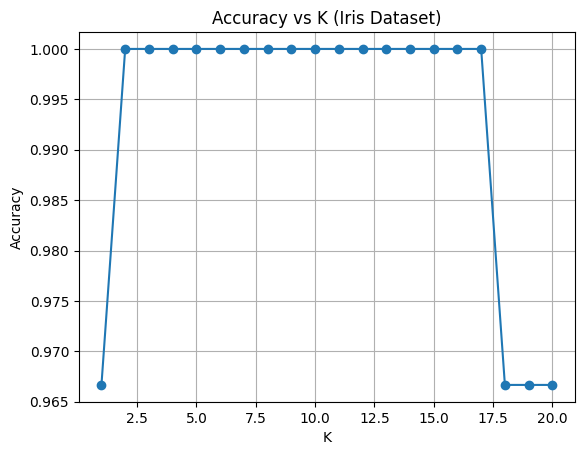

In [10]:
plt.plot(k_values, accuracies, marker='o')
plt.title("Accuracy vs K (Iris Dataset)")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

# Evaluate with Confusion Matrix

In [11]:
import seaborn as sns
best_k = k_values[accuracies.index(max(accuracies))]
print(f"Best K: {best_k}")

Best K: 2


In [12]:
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred_best = knn_best.predict(X_test)

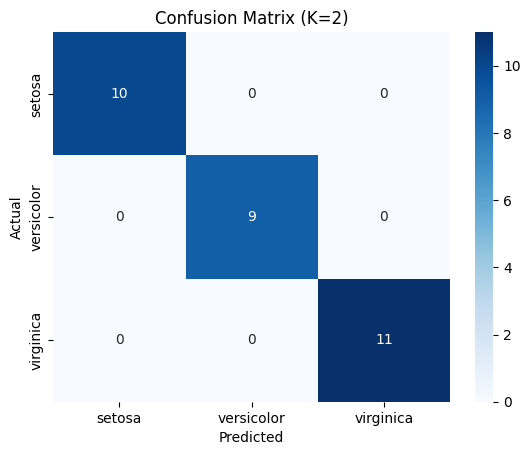

In [13]:
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.title(f"Confusion Matrix (K={best_k})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Visualize Decision Boundaries 

In [14]:
import numpy as np

In [15]:
X_vis = X_scaled[:, :2]

In [16]:
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y, test_size=0.2, random_state=42)

In [17]:
knn_vis = KNeighborsClassifier(n_neighbors=best_k)
knn_vis.fit(X_train_vis, y_train_vis)

KNeighborsClassifier(n_neighbors=2)

In [18]:
h = .02 
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

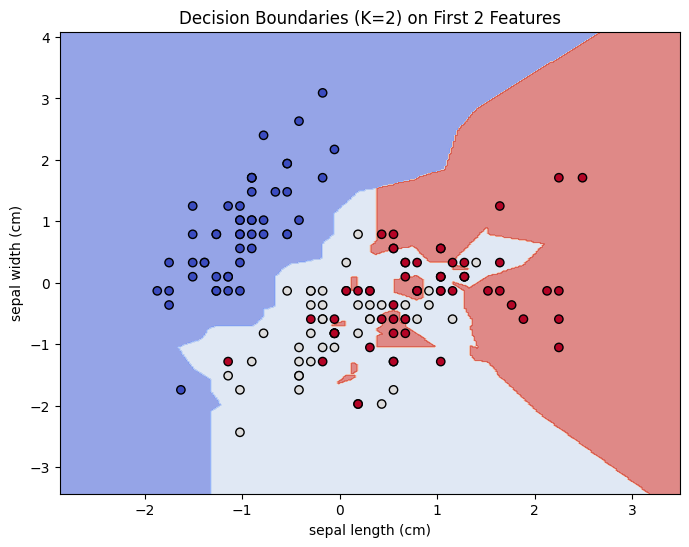

In [19]:
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.6)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
plt.title(f"Decision Boundaries (K={best_k}) on First 2 Features")
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.show()